In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

<h2>1. Data Loading & Exploration (EDA)</h2>
Load the dataset into Pandas.<br>
Display the first few rows and dataset statistics.<br>
Check for missing values and data types.<br><br>
<b>Perform data visualization:</b><br>

Distributions of numerical features.<br>
Count plots for categorical features.<br>
Correlation heatmap for numerical features.<br>
Any other visualization relevant to your dataset.<br>

In [3]:
df = pd.read_csv("loan_approval_dataset.csv")

df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [4]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


<p>As can be seen, the dataset contains <strong>13 columns</strong>, all of which are readable. <br>
    The dataset has <strong>4269 observations</strong>. <br>
    Among the columns, <strong>10 are numerical (int64)</strong> and <strong>3 are categorical (object)</strong>. 

<p>The columns represent details like:</p>
<ul>
  <li><strong>loan_id</strong>: Unique identifier for each loan</li>
  <li><strong>no_of_dependents</strong>: Number of dependents of the applicant</li>
  <li><strong>education</strong>: Education level of the applicant</li>
  <li><strong>self_employed</strong>: Employment type of the applicant</li>
  <li><strong>income_annum</strong>: Annual income of the applicant</li>
  <li><strong>loan_amount</strong>: Amount of loan requested</li>
  <li><strong>loan_term</strong>: Term/duration of the loan</li>
  <li><strong>cibil_score</strong>: Credit score of the applicant</li>
  <li><strong>residential_assets_value</strong>: Value of residential assets</li>
  <li><strong>commercial_assets_value</strong>: Value of commercial assets</li>
  <li><strong>luxury_assets_value</strong>: Value of luxury assets</li>
  <li><strong>bank_asset_value</strong>: Value of bank assets</li>
  <li><strong>loan_status</strong>: Status of loan approval</li>
</ul>


In [6]:
# Checking for missing values
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

<p>As can be seen, there are <strong>no missing values</strong> in any of the 13 columns. All columns have <strong>0 missing entries</strong>, making the dataset complete and ready for analysis.</p>

<h3>Data Exploration</h3>

<h4>Categorical Variables</h4>

In [11]:
# Removing any trailing or leading space from the columns name
df.columns = df.columns.str.strip()

In [12]:
# Finding Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['education', 'self_employed', 'loan_status']

<h3>Count Plot of Categorical Data</h3>

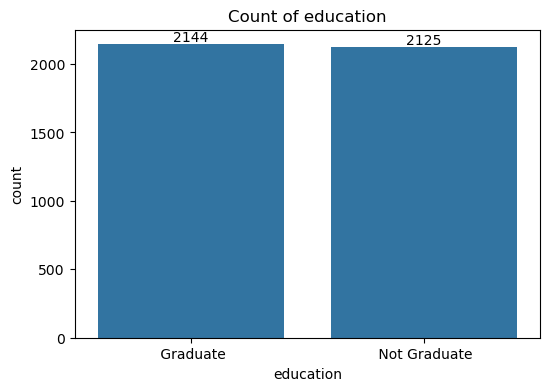

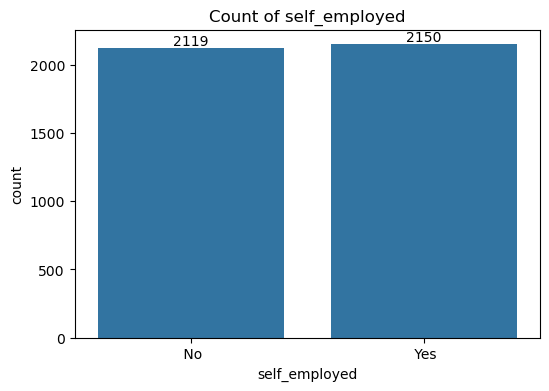

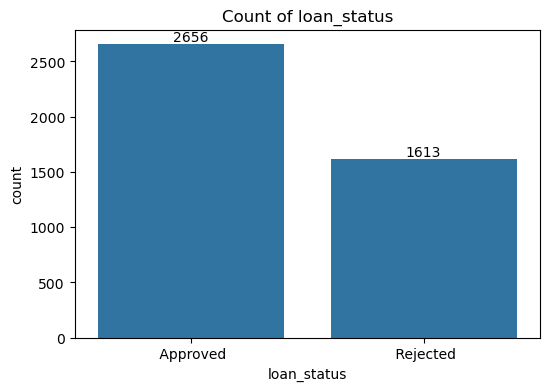

In [14]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x=col, data=df)
    ax.bar_label(ax.containers[0])  
    ax.set_title(f'Count of {col}') 
    plt.show()

<h4>Numerical Variables</h4>

In [16]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
numerical_cols

['loan_id',
 'no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

<h3>Distribution Plot of Numerical Data</h3>

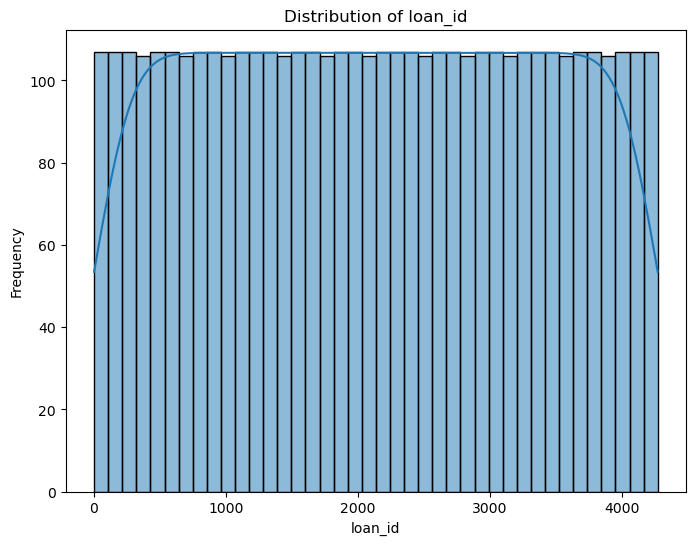

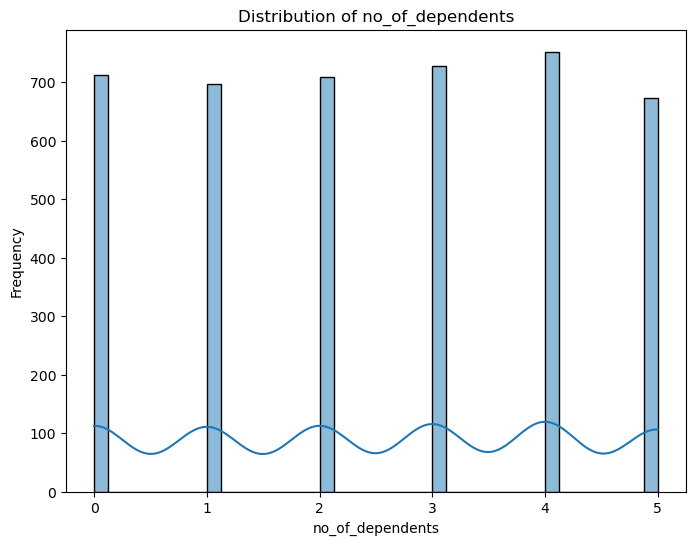

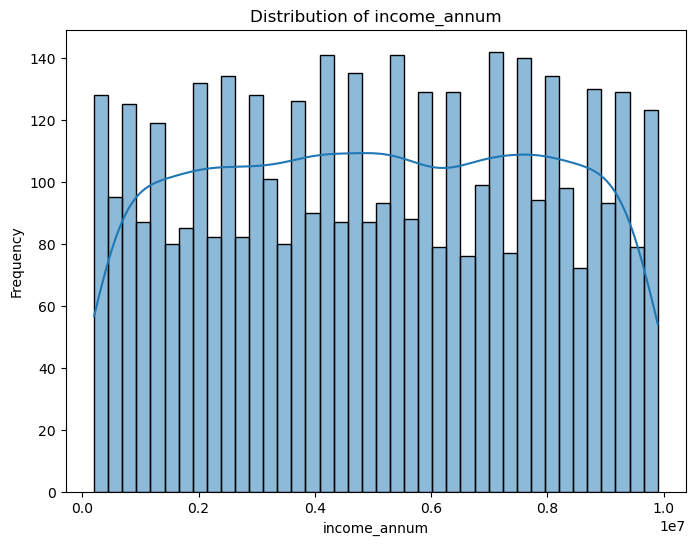

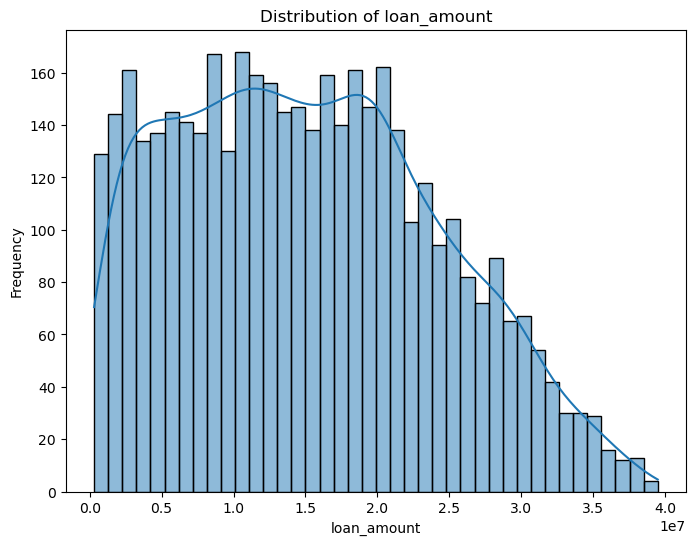

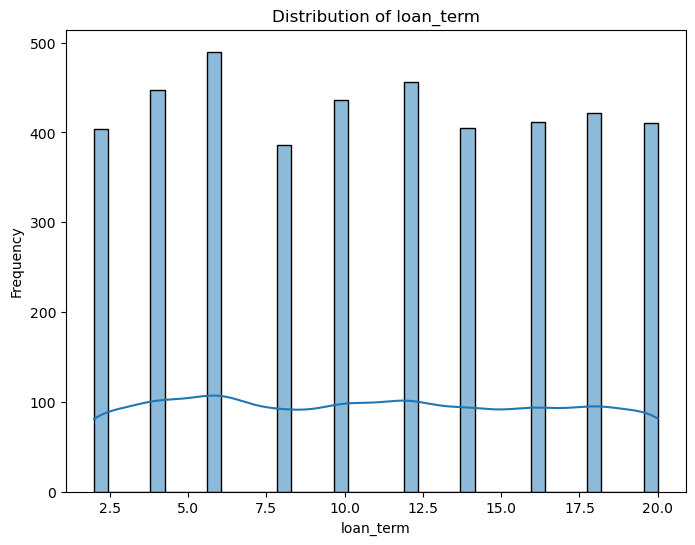

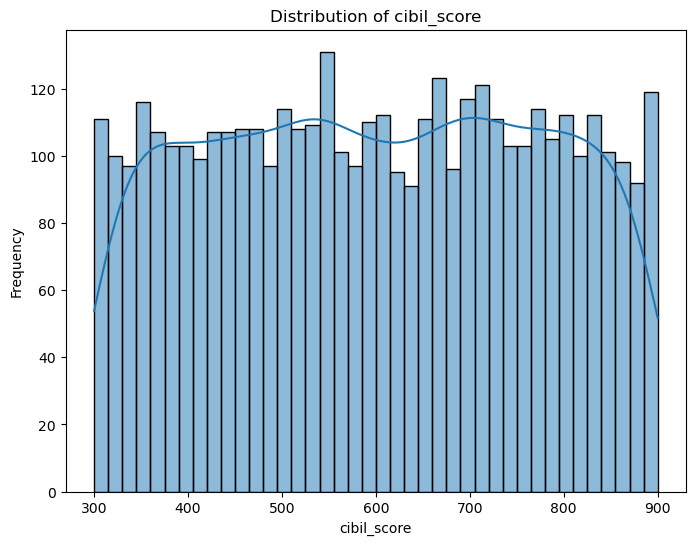

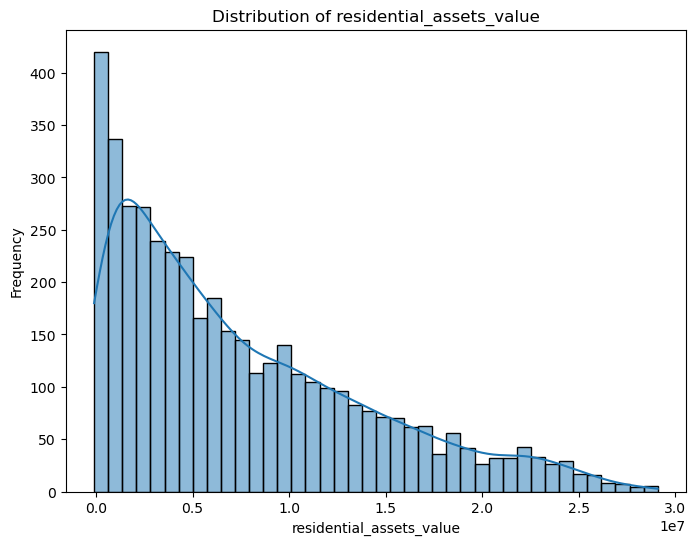

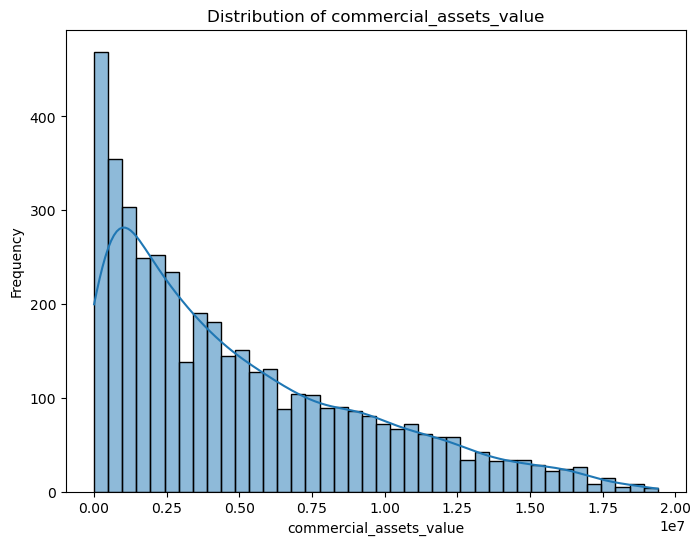

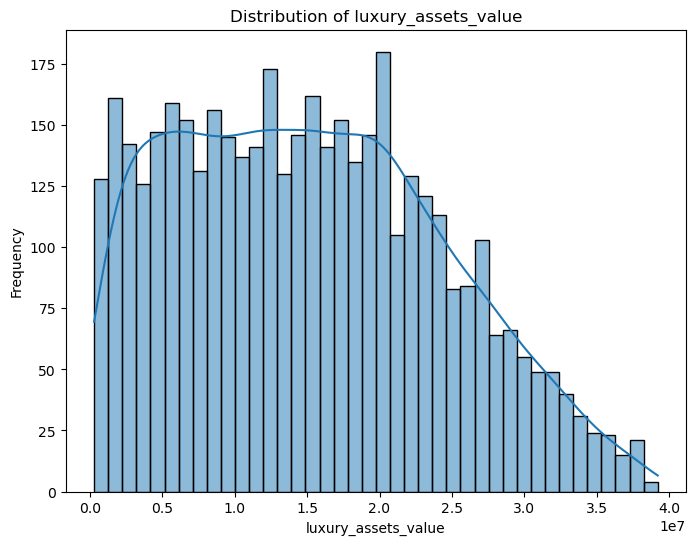

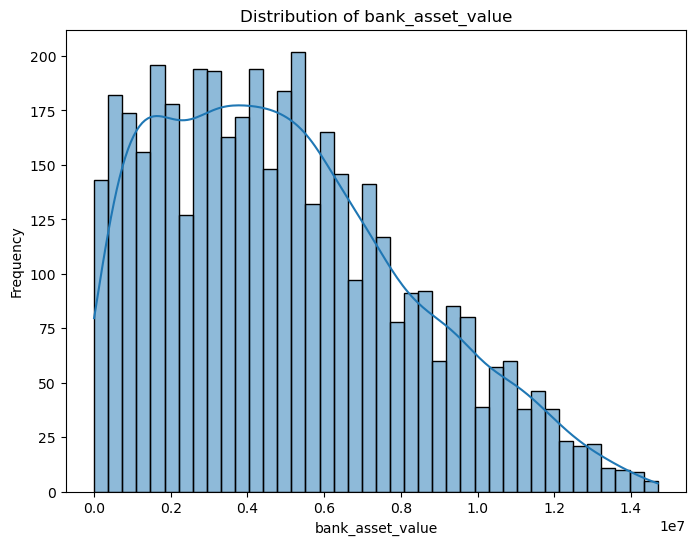

In [18]:
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<h3>Correlation Heatmap of Numerical Data</h3>

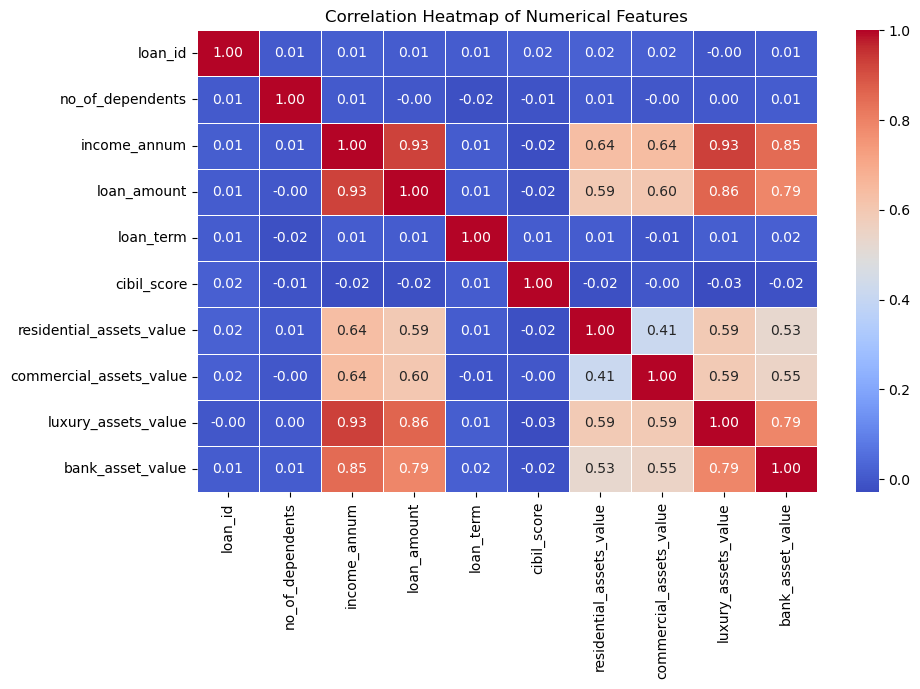

In [20]:
# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<h3>Numericl Features vs Target Variable</h3>
<p> To find how numerical features differ for approved vs rejected loans.</p>

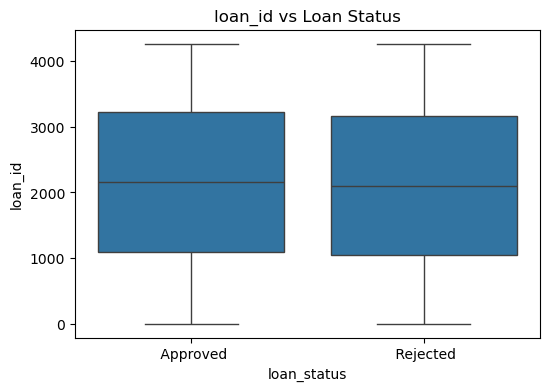

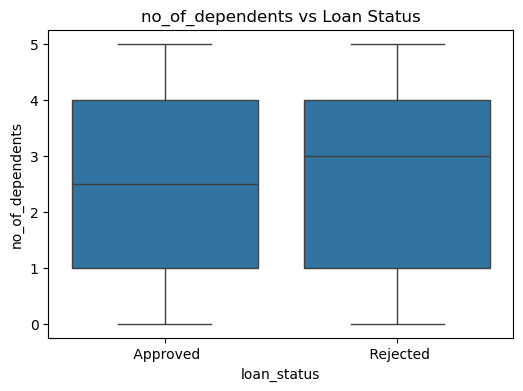

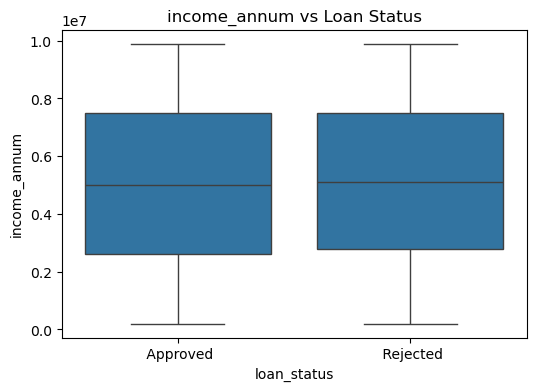

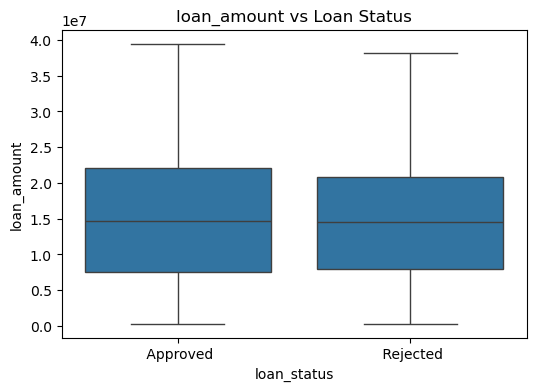

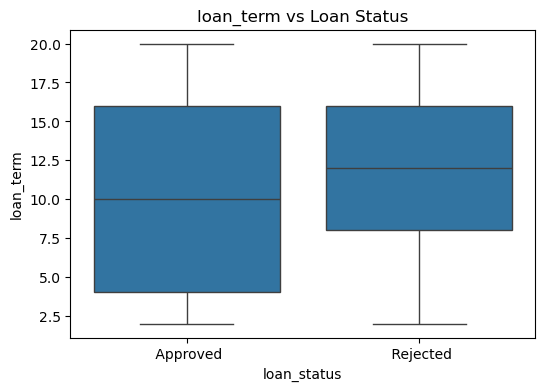

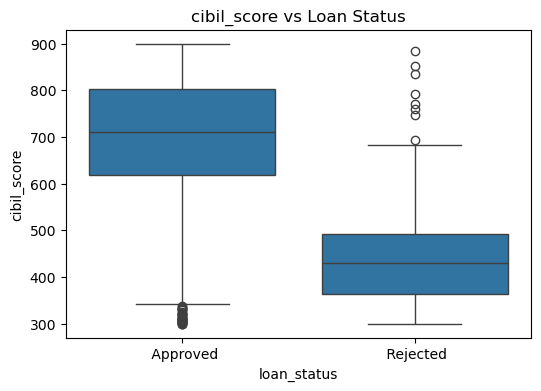

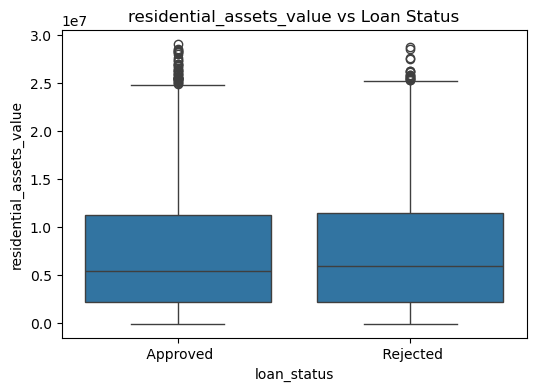

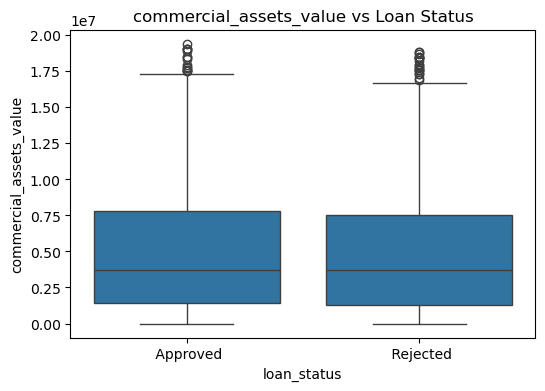

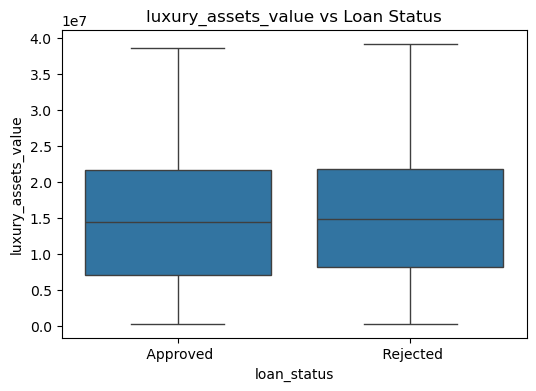

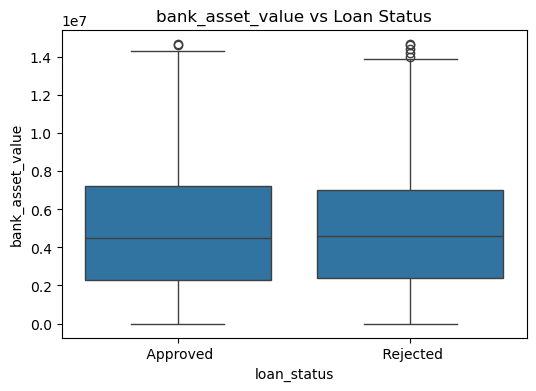

In [22]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'{col} vs Loan Status')
    plt.show()

<h3>Categorical Features vs Target Variable</h3>
<p> To find how categorical features differ for approved vs rejected loans.</p>

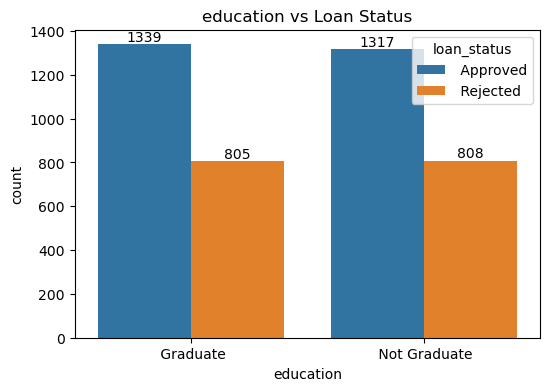

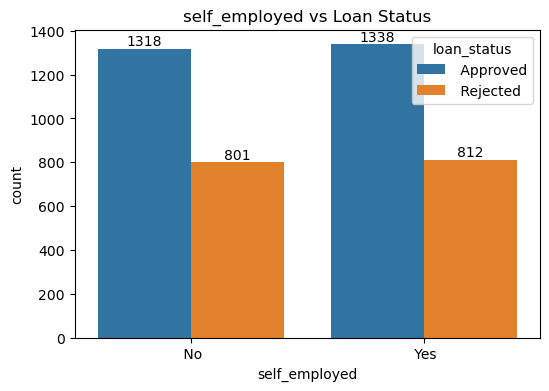

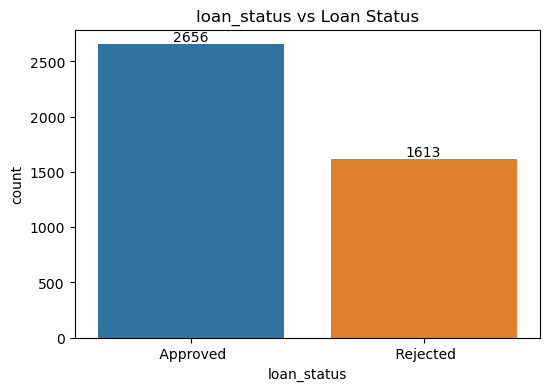

In [24]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x=col, hue='loan_status', data=df)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    plt.title(f'{col} vs Loan Status')
    plt.show()

<h3>PairPlot </h3>

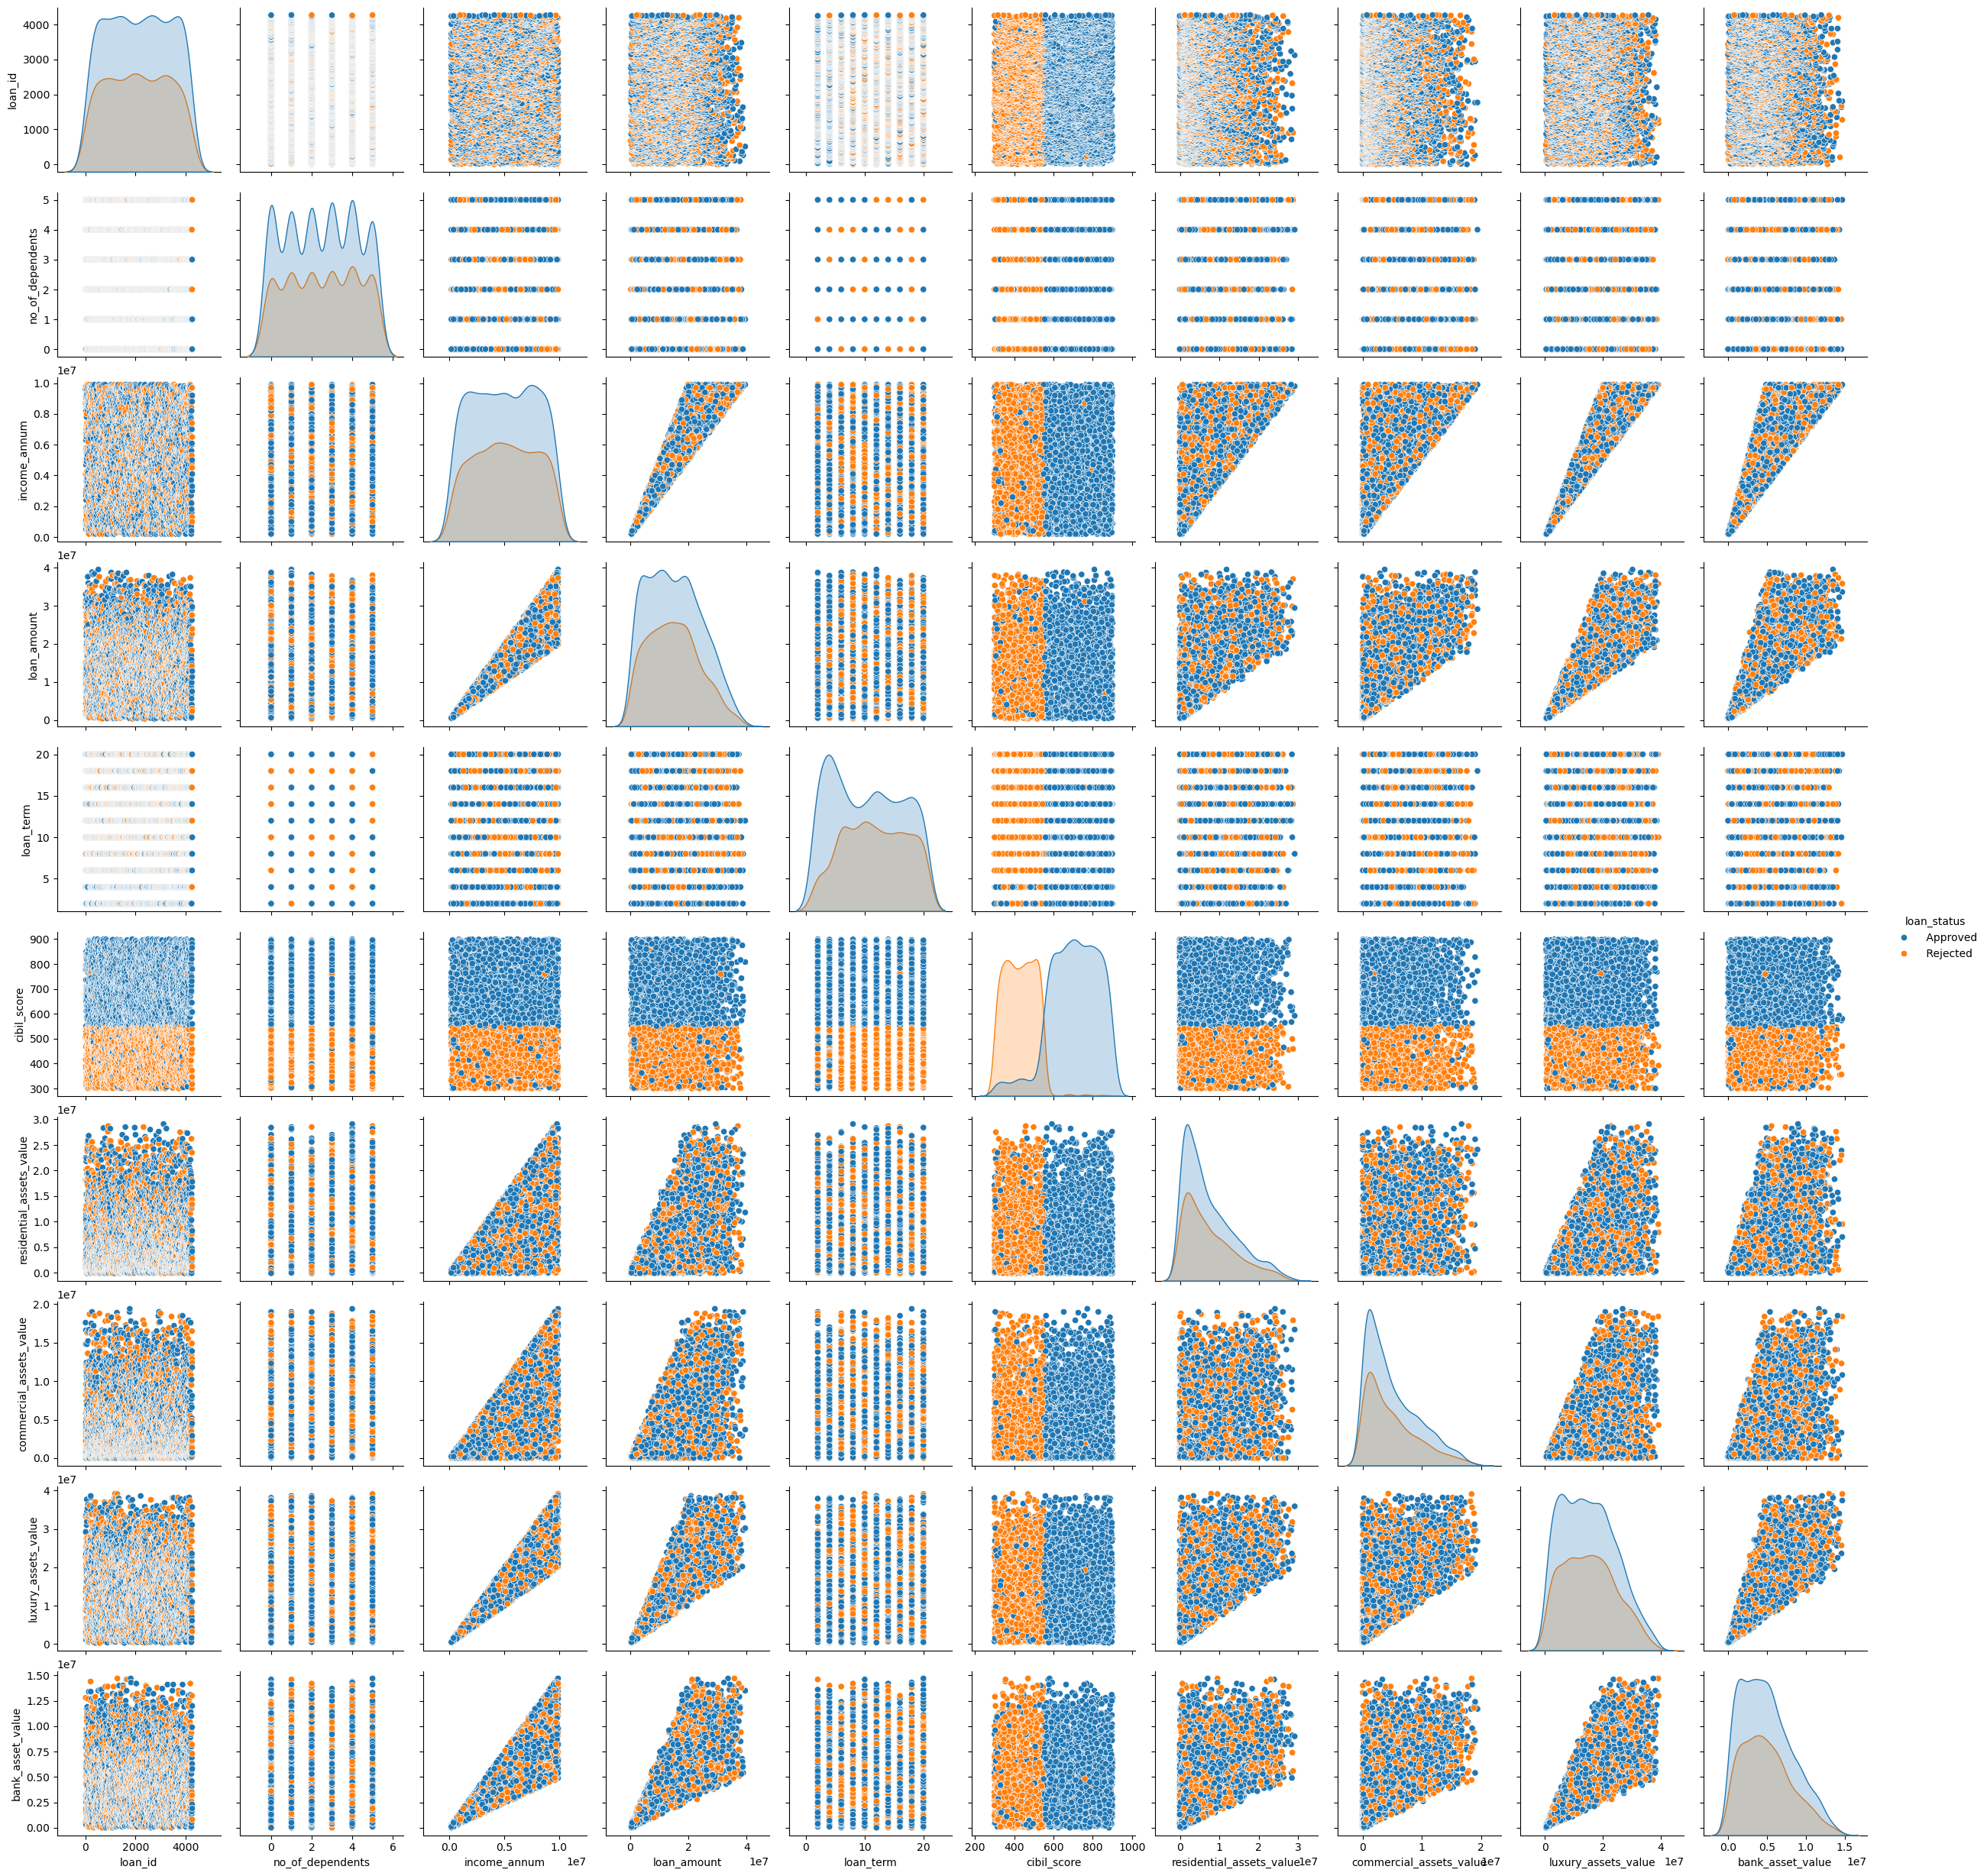

In [26]:
sns.pairplot(df[numerical_cols + ['loan_status']], hue='loan_status')
plt.show()

<h3>2. Data Cleaning</h3>
Handle missing values (mean/median/mode imputation or drop).<br>
Remove irrelevant or duplicate columns if necessary.</br>
Handle outliers if present.</br>

<p> Since we already know that there are no missing values in the dataset we move on to check duplicate columns</p>

<p> <b>Since we already know that there are no missing values so we don't need to handle the missing values related problems</b></p>

<h3>For Duplicate Columns</h3>

In [31]:
# Select duplicated columns
duplicate_columns = df.loc[:, df.columns.duplicated()]

print("Duplicate columns:", list(duplicate_columns.columns))

Duplicate columns: []


<p>As we can see there are no duplicate columns</p>

<h4>Checking for duplicate records</h4>

In [34]:
# Check duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


<p>As we can see there are no duplicated records in the dataset</p>

<h3>Dropping Irrelevant Columns</h3>
<p> the only irrelevant columns in the dataset is loan_id as it does not have any significant affect on our target loan_status.</p>

In [37]:
# Dropping loan_id
df.drop(columns=['loan_id'], inplace=True)
df.head()

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected  
4             29400000           5000000    Rejected

<h3>Outlier Handling</h3>

<h4>Checking outlier using boxplot.</h4>

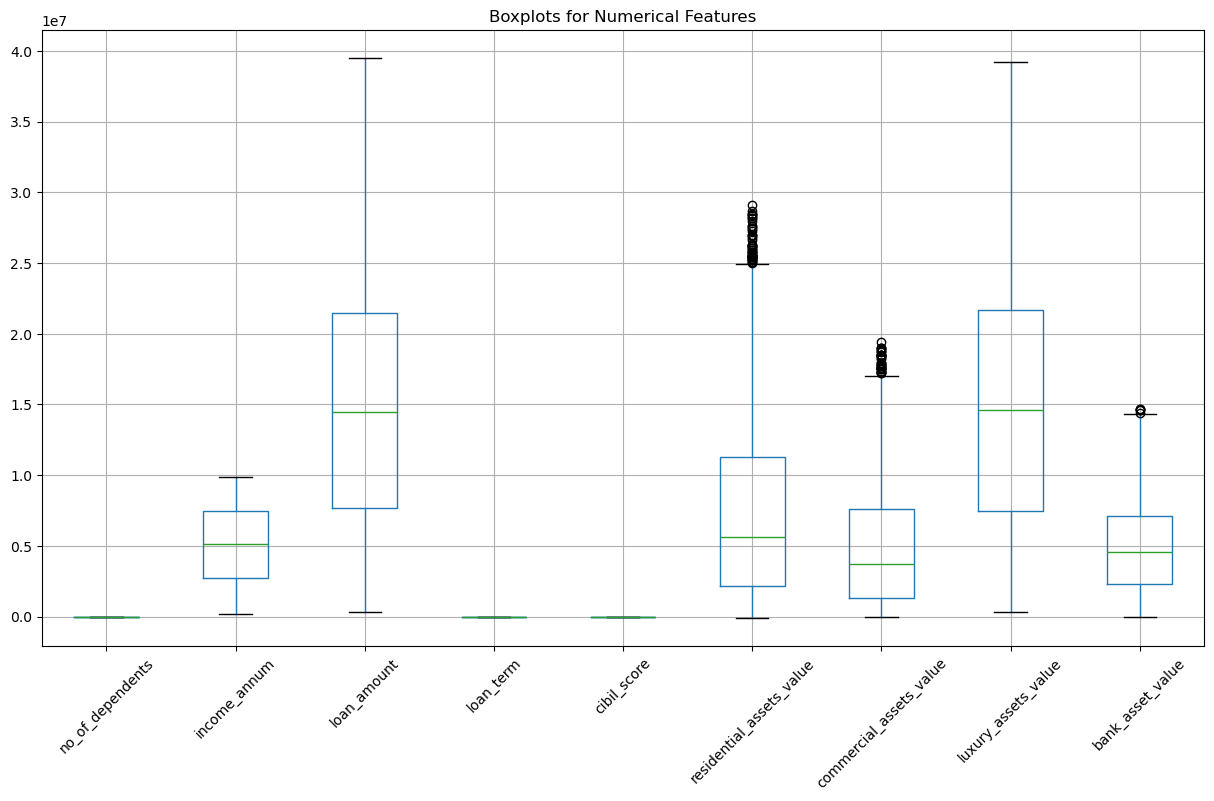

In [40]:
numerical_cols.remove('loan_id')
plt.figure(figsize=(15,8))
df[numerical_cols].boxplot()
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=45)
plt.show()

<p>From the boxplot above we can see that there are a lot of outliers on the upper range with max in residential_assets_value, then in commercial_assets_value and less in bank asset_value.</p>

<h4>Checking Outliers using IQR Method</h4>

In [43]:
outlier_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    count = outliers.shape[0]
    percentage = (count / df.shape[0]) * 100
    outlier_summary[col] = {'Outlier Count': count, 'Outlier Percentage': round(percentage, 2)}

# Convert to DataFrame
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index').reset_index().rename(columns={'index':'Column'})

print(outlier_df)

                     Column  Outlier Count  Outlier Percentage
0          no_of_dependents              0                0.00
1              income_annum              0                0.00
2               loan_amount              0                0.00
3                 loan_term              0                0.00
4               cibil_score              0                0.00
5  residential_assets_value             52                1.22
6   commercial_assets_value             37                0.87
7       luxury_assets_value              0                0.00
8          bank_asset_value              5                0.12


<p>Also same from the IQR method we can see that there are outliers in following columns: <br>
residential_assets_value, commercial_assets_value, bank_asset_value </p>

<h4>Using Winsorization for Handling Outliers from the dataset by capping them</h4>
<p> This is preferred as logistics regression it better supported with it and there are negative values in the dataset.</p>

In [46]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

<h3>Checking Outliers after winsorization method</h3>

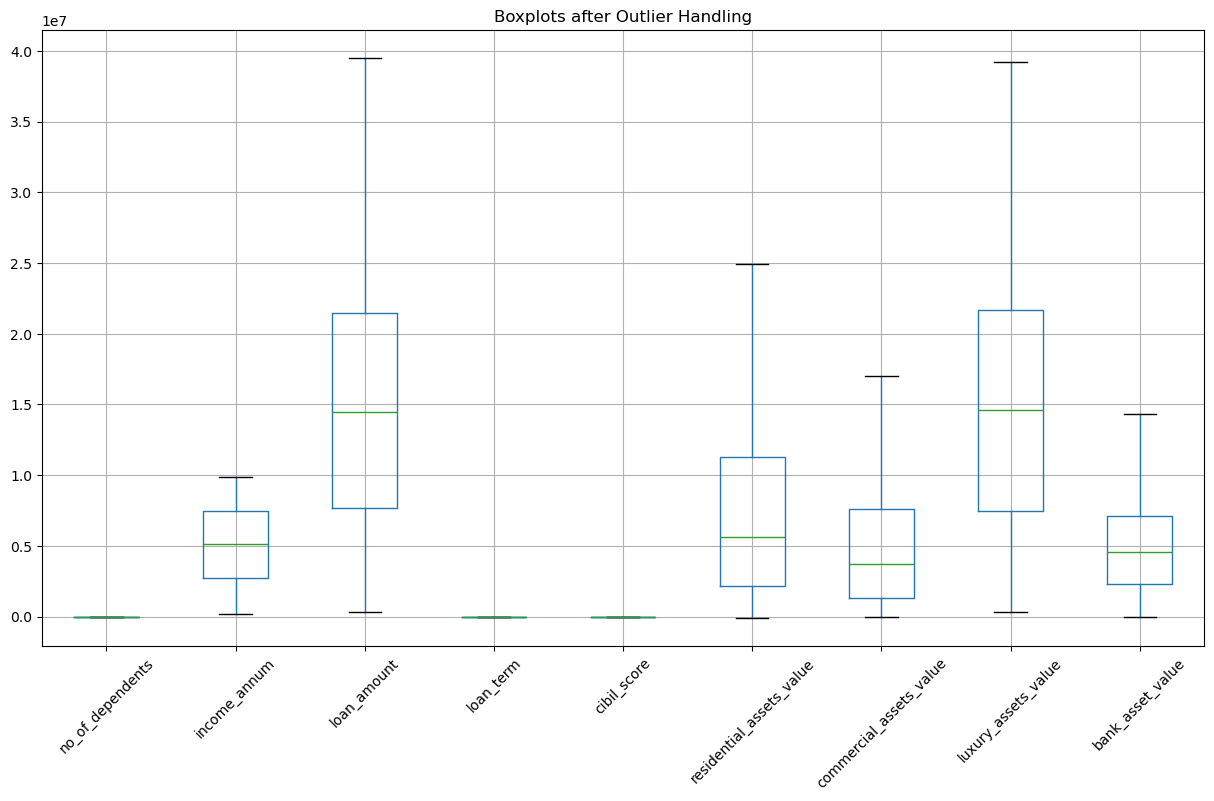

In [48]:
plt.figure(figsize=(15,8))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots after Outlier Handling")
plt.show()

<h2>3. Feature Engineering</h2>

### Creating new Features

#### a. Debt-to-Income Ratio

In [52]:
df['debt_to_income'] = df['loan_amount'] / df['income_annum']
df['debt_to_income']

0       3.114583
1       2.975610
2       3.263736
3       3.743902
4       2.469388
          ...   
4264    2.300000
4265    3.424242
4266    3.676923
4267    3.121951
4268    3.228261
Name: debt_to_income, Length: 4269, dtype: float64

#### b. Total Assets

In [54]:
df['total_assets'] = df['residential_assets_value'] + df['commercial_assets_value'] + \
                     df['luxury_assets_value'] + df['bank_asset_value']
df['total_assets']

0       50150000
1       17000000
2       57700000
3       52700000
4       55000000
          ...   
4264     7400000
4265    20000000
4266    39000000
4267    28800000
4268    77300000
Name: total_assets, Length: 4269, dtype: int64

#### 3. Asset-to-Loan Ratio

In [56]:
df['asset_to_loan_ratio'] = df['total_assets'] / df['loan_amount']
df['asset_to_loan_ratio']

0       1.677258
1       1.393443
2       1.942761
3       1.716612
4       2.272727
          ...   
4264    3.217391
4265    1.769912
4266    1.631799
4267    2.250000
4268    2.602694
Name: asset_to_loan_ratio, Length: 4269, dtype: float64

### Binning

#### a. Dependents Binning

In [59]:
df['dependents_group'] = pd.cut(
    df['no_of_dependents'], 
    bins=[-1,0,2,10], 
    labels=['0','1-2','3+']
)

df['dependents_group']

0       1-2
1         0
2        3+
3        3+
4        3+
       ... 
4264     3+
4265      0
4266    1-2
4267    1-2
4268    1-2
Name: dependents_group, Length: 4269, dtype: category
Categories (3, object): ['0' < '1-2' < '3+']

#### b. Loan Term Binning

In [61]:
df['loan_term_group'] = pd.cut(
    df['loan_term'],
    bins=[0, 12, 36, 60, 120],
    labels=['short', 'medium', 'long', 'very_long']
)

df['loan_term_group']

0        short
1        short
2       medium
3        short
4       medium
         ...  
4264     short
4265    medium
4266    medium
4267     short
4268     short
Name: loan_term_group, Length: 4269, dtype: category
Categories (4, object): ['short' < 'medium' < 'long' < 'very_long']

## 4. Data Encoding and Transformation

#### Encode ordinal feature: Education

In [64]:
le_edu = LabelEncoder()
df['education_encoded'] = le_edu.fit_transform(df['education'])

#### Label Encoding for Loan_status

In [66]:
le_target = LabelEncoder()
df['loan_status_encoded'] = le_target.fit_transform(df['loan_status'])

#### One-Hot Encoding for nominal categorical features

In [68]:
df = pd.get_dummies(
    df,
    columns=['self_employed', 'dependents_group', 'loan_term_group'],
    drop_first=True
)

#### Columns to drop redundant columns after binning and encoding

In [70]:
columns_to_drop = ['no_of_dependents', 'loan_term', 'education', 'loan_status']
df.drop(columns=columns_to_drop, inplace=True)

#### Scaling Numerical Features

In [72]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove('loan_status_encoded')

numerical_features

['income_annum',
 'loan_amount',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'debt_to_income',
 'total_assets',
 'asset_to_loan_ratio',
 'education_encoded']

In [73]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [74]:
df.head()

income_annum  loan_amount  cibil_score  residential_assets_value  \
0      1.617979     1.633052     1.032792                 -0.783495   
1     -0.341750    -0.324414    -1.061051                 -0.736995   
2      1.439822     1.610933    -0.544840                 -0.055003   
3      1.119139     1.721525    -0.771045                  1.665478   
4      1.689242     1.002681    -1.264055                  0.766488   

   commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                 2.770319             0.832028          0.930707   
1                -0.633638            -0.694993         -0.515991   
2                -0.106426             1.996520          2.408185   
3                -0.381493             0.897943          0.899926   
4                 0.741698             1.568075          0.007282   

   debt_to_income  total_assets  asset_to_loan_ratio  education_encoded  \
0        0.217956      0.906250            -0.861815          -0.995559   
1       -0.015446     -0.797962            -1.303695           1.004461   
2        0.468454      1.294389            -0.448446          -0.995559   
3        1.274879      1.037343            -0.800543          -0.995559   
4       -0.865631      1.155584             0.065288           1.004461   

   loan_status_encoded  self_employed_ Yes  dependents_group_1-2  \
0                    0               False                  True   
1                    1                True                 False   
2                    1               False                 False   
3                    1               False                 False   
4                    1                True                 False   

   dependents_group_3+  loan_term_group_medium  loan_term_group_long  \
0                False                   False                 False   
1                False                   False                 False   
2                 True                    True                 False   
3                 True                   False                 False   
4                 True                    True                 False   

   loan_term_group_very_long  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False

## 5. Model Training

#### a.Preparing Features and Targets

In [77]:
X = df.drop(columns=['loan_status_encoded']) #Features

y = df['loan_status_encoded'] #Target

#### b.Splitting the dataset Train-Test(80-20)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### c. K-Fold Cross Validation Setup

In [81]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 5. Models 

#### a. Logistic Regression

In [84]:
# Initialize the Model
lr = LogisticRegression(max_iter=1000, random_state=42)

In [85]:
# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr, X_train, y_train, cv=kf, scoring='accuracy')

print("Logistic Regression CV Mean Accuracy:", cv_scores.mean())
print("Logistic Regression CV Std Dev:", cv_scores.std())

Logistic Regression CV Mean Accuracy: 0.9092240117130308
Logistic Regression CV Std Dev: 0.011528562041012894


In [86]:
# Train on full training set
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### b. Decision Tree

In [88]:
# Initialize model
dt = DecisionTreeClassifier(random_state=42)

In [89]:
# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt, X_train, y_train, cv=kf, scoring='accuracy')

print("Decision Tree CV Mean Accuracy:", cv_scores.mean())
print("Decision Tree CV Std Dev:", cv_scores.std())

Decision Tree CV Mean Accuracy: 0.9382137628111273
Decision Tree CV Std Dev: 0.01093303350078737


In [90]:
# Train on full training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### c. Random Forest

In [92]:
# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [93]:
# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='accuracy')

print("Random Forest CV Mean Accuracy:", cv_scores.mean())
print("Random Forest CV Std Dev:", cv_scores.std())

Random Forest CV Mean Accuracy: 0.9496339677891654
Random Forest CV Std Dev: 0.005287106906374185


In [94]:
# Train on full training set
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### d. SVM

In [96]:
# Initialize SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

In [97]:
# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=kf, scoring='accuracy')

print("SVM CV Mean Accuracy:", cv_scores.mean())
print("SVM CV Std Dev:", cv_scores.std())

SVM CV Mean Accuracy: 0.919765739385066
SVM CV Std Dev: 0.005958122971998765


In [98]:
# Train on full training set
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

#### e. KNN

In [100]:
# Initialize KNN (choose k=5 as default)
knn = KNeighborsClassifier(n_neighbors=5)

In [101]:
# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')

print("KNN CV Mean Accuracy:", cv_scores.mean())
print("KNN CV Std Dev:", cv_scores.std())

KNN CV Mean Accuracy: 0.8696925329428989
KNN CV Std Dev: 0.01091733638788126


In [102]:
# Train on full training set
knn.fit(X_train, y_train)

KNeighborsClassifier()

## 6. Model Evaluation

#### a. Logistic Regression Evaluation

In [105]:
# Predictions
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]  # For ROC-AUC

In [106]:
# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", cm)

Test Accuracy: 0.9250585480093677
Precision: 0.9218241042345277
Recall: 0.8761609907120743
F1-score: 0.8984126984126984
ROC-AUC: 0.9710634179333344
Confusion Matrix:
 [[507  24]
 [ 40 283]]


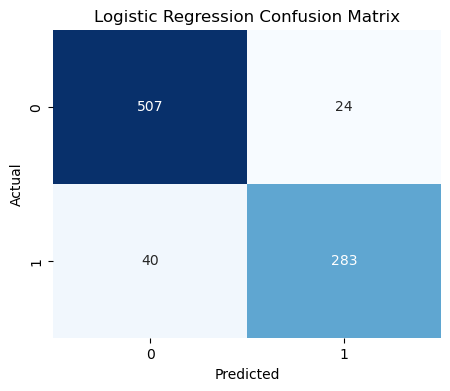

In [107]:
# Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

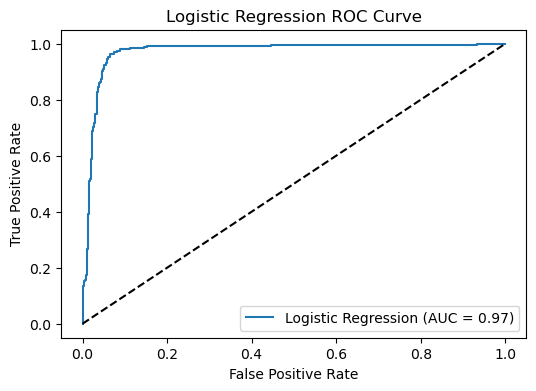

In [108]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

<h3>Logistic Regression – Model Evaluation</h3>

<ul>
  <li><strong>Cross-Validation (Training Set):</strong> Mean Accuracy: <strong>0.909</strong>, Std Dev: <strong>0.012</strong> – stable and consistent.</li>
  
  <li><strong>Test Set Metrics:</strong> Accuracy: <strong>0.925</strong>, Precision: <strong>0.922</strong>, Recall: <strong>0.876</strong>, F1-score: <strong>0.898</strong>, ROC-AUC: <strong>0.971</strong> – excellent class separation.</li>
  
  <li><strong>Confusion Matrix:</strong>
    <pre>
[[507  24]
 [ 40 283]]
    </pre>
    Slightly conservative → fewer false approvals, more reliable.
  </li>
  
  <li><strong>Conclusion:</strong> Logistic Regression is <strong>accurate, stable, and suitable</strong> for loan approval prediction.</li>
</ul>


#### b. Decision Tree Evaluation

In [111]:
# Predictions
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]  # For ROC-AUC

In [112]:
# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", cm)

Test Accuracy: 0.9484777517564403
Precision: 0.9428571428571428
Recall: 0.9195046439628483
F1-score: 0.9310344827586207
ROC-AUC: 0.9428031694390513
Confusion Matrix:
 [[513  18]
 [ 26 297]]


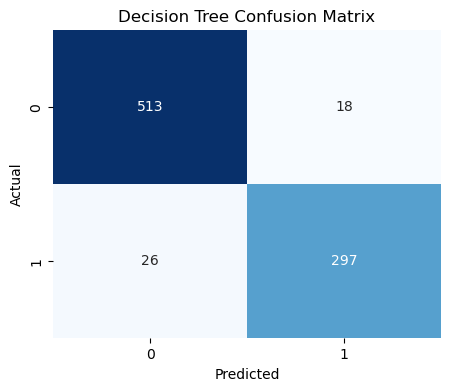

In [113]:
# Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

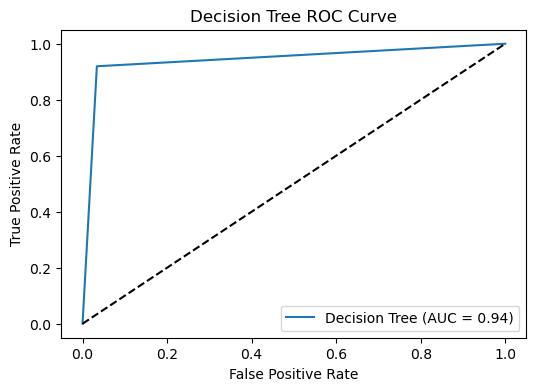

In [114]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.show()

<h3>Decision Tree – Model Evaluation</h3>

<ul>
  <li><strong>Cross-Validation (Training Set):</strong> Mean Accuracy: <strong>93.82%</strong>, Std Dev: <strong>1.09%</strong> – stable and consistent.</li>
  
  <li><strong>Test Set Metrics:</strong> Accuracy: <strong>94.85%</strong>, Precision: <strong>94.29%</strong>, Recall: <strong>91.95%</strong>, F1-score: <strong>93.10%</strong>, ROC-AUC: <strong>94.28%</strong> – excellent class separation.</li>
  
  <li><strong>Confusion Matrix:</strong>
    <pre>
[[513  18]
 [ 26 297]]
    </pre>
    Slightly conservative → fewer false approvals, more reliable.
  </li>
  
  <li><strong>Conclusion:</strong> Decision Tree is <strong>accurate, stable, and suitable</strong> for loan approval prediction.</li>
</ul>


#### c. Random Forest Evaluation

In [117]:
# Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]  # For ROC-AUC

In [118]:
# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", cm)

Test Accuracy: 0.9648711943793911
Precision: 0.9221902017291066
Recall: 0.9907120743034056
F1-score: 0.9552238805970149
ROC-AUC: 0.9921201308355635
Confusion Matrix:
 [[504  27]
 [  3 320]]


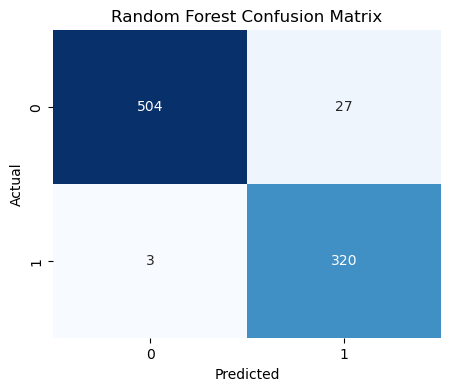

In [119]:
# Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

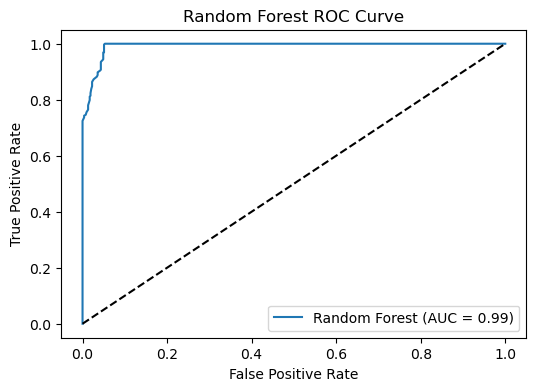

In [120]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

<h3>Random Forest – Model Evaluation</h3>

<ul>
  <li><strong>Cross-Validation (Training Set):</strong> Mean Accuracy: <strong>94.96%</strong>, Std Dev: <strong>0.53%</strong> – stable and consistent.</li>
  
  <li><strong>Test Set Metrics:</strong> Accuracy: <strong>96.49%</strong>, Precision: <strong>92.22%</strong>, Recall: <strong>99.07%</strong>, F1-score: <strong>95.52%</strong>, ROC-AUC: <strong>99.21%</strong> – excellent class separation.</li>
  
  <li><strong>Confusion Matrix:</strong>
    <pre>
[[504  27]
 [  3 320]]
    </pre>
    Highly conservative → very few false negatives, captures almost all approved loans.
  </li>
  
  <li><strong>Conclusion:</strong> Random Forest is <strong>highly accurate, stable, and reliable</strong> for loan approval prediction.</li>
</ul>


#### d. SVM Evaluation

In [123]:
# Predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:,1]  # For ROC-AUC

In [124]:
# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", cm)

Test Accuracy: 0.9402810304449649
Precision: 0.9276729559748428
Recall: 0.913312693498452
F1-score: 0.9204368174726989
ROC-AUC: 0.9756286695469147
Confusion Matrix:
 [[508  23]
 [ 28 295]]


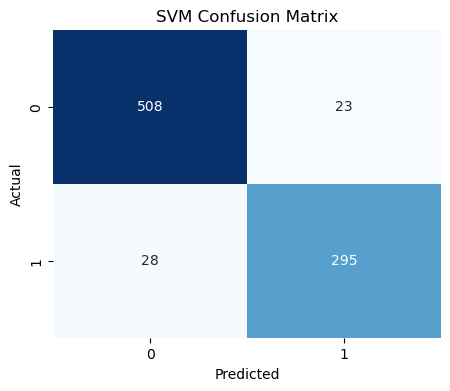

In [125]:
# Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

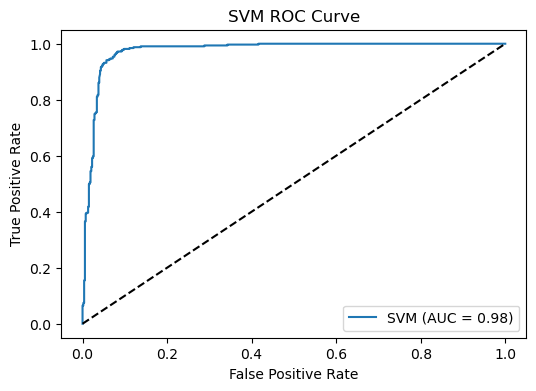

In [126]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()

<h3>SVM – Model Evaluation</h3>

<ul>
  <li><strong>Cross-Validation (Training Set):</strong> Mean Accuracy: <strong>91.98%</strong>, Std Dev: <strong>0.60%</strong> – stable and consistent.</li>
  
  <li><strong>Test Set Metrics:</strong> Accuracy: <strong>94.03%</strong>, Precision: <strong>92.77%</strong>, Recall: <strong>91.33%</strong>, F1-score: <strong>92.04%</strong>, ROC-AUC: <strong>97.56%</strong> – excellent class separation.</li>
  
  <li><strong>Confusion Matrix:</strong>
    <pre>
[[508  23]
 [ 28 295]]
    </pre>
    Slightly conservative → few false approvals, reliable predictions.
  </li>
  
  <li><strong>Conclusion:</strong> SVM is <strong>accurate, stable, and suitable</strong> for loan approval prediction.</li>
</ul>


#### e. KNN Evaluation

In [129]:
# Predictions
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]  # For ROC-AUC

In [130]:
# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", cm)

Test Accuracy: 0.8957845433255269
Precision: 0.8798701298701299
Recall: 0.8390092879256966
F1-score: 0.8589540412044374
ROC-AUC: 0.9554727629975569
Confusion Matrix:
 [[494  37]
 [ 52 271]]


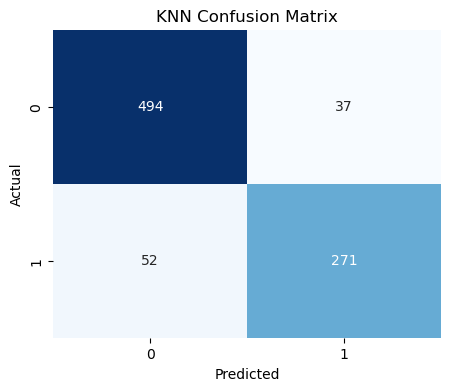

In [131]:
# Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

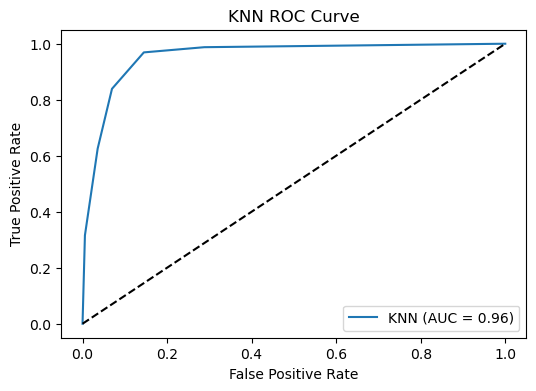

In [132]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend()
plt.show()

<h3>KNN – Model Evaluation</h3>

<ul>
  <li><strong>Cross-Validation (Training Set):</strong> Mean Accuracy: <strong>86.97%</strong>, Std Dev: <strong>1.09%</strong> – reasonably stable.</li>
  
  <li><strong>Test Set Metrics:</strong> Accuracy: <strong>89.58%</strong>, Precision: <strong>87.99%</strong>, Recall: <strong>83.90%</strong>, F1-score: <strong>85.90%</strong>, ROC-AUC: <strong>95.55%</strong> – good class separation.</li>
  
  <li><strong>Confusion Matrix:</strong>
    <pre>
[[494  37]
 [ 52 271]]
    </pre>
    Slightly less conservative → more false negatives compared to other models.
  </li>
  
  <li><strong>Conclusion:</strong> KNN is <strong>decently accurate and stable</strong>, but slightly underperforms compared to other models for loan approval prediction.</li>
</ul>


## BEST MODEL --> Random Forest with 96.49% accuracy

## 7. Prediction
#### Using Random Forest which has the highest accuracy
#### Doing predicition on test set 

In [136]:
# Predictions on the test set
y_test_pred = rf.predict(X_test)  # Predicted labels
y_test_prob = rf.predict_proba(X_test)[:,1]  # Probability of approval 

In [137]:
# DataFrame for Saving the Predictions
prediction_df = X_test.copy()  # Features
prediction_df['Actual_Loan_Status'] = y_test.values
prediction_df['Predicted_Loan_Status'] = y_test_pred
prediction_df['Approval_Probability'] = y_test_prob

# Decode label back to original loan_status ('Approved'/'Rejected')
prediction_df['Predicted_Loan_Status_Label'] = le_target.inverse_transform(y_test_pred)

In [138]:
# Saving predictions to CSV
prediction_df.to_csv('loan_approval_predictions.csv', index=False)

In [139]:
df_pred = pd.read_csv("loan_approval_predictions.csv")
df_pred

income_annum  loan_amount  cibil_score  residential_assets_value  \
0        1.047876     1.223864     1.682406                  1.293482   
1       -1.125641    -1.209144     0.116373                 -0.426999   
2       -0.626801    -0.611951     1.717207                  0.378992   
3       -0.911852    -0.700424    -0.359237                 -0.395999   
4        1.012245     1.566697     0.992192                  1.572479   
..            ...          ...          ...                       ...   
849      1.047876     1.511401    -0.138832                  1.758477   
850      1.297296     0.361252    -1.194454                  1.758477   
851      1.439822     1.268100     1.229997                  2.455969   
852      1.439822     1.964826     0.678985                 -0.814494   
853     -0.199224    -0.302296    -0.556441                  0.704489   

     commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                  -0.152270             1.084701         -0.300526   
1                  -0.496104            -0.837808         -1.254731   
2                  -0.931627            -0.332463         -0.023498   
3                  -0.725327            -0.662036         -0.515991   
4                   1.796123             0.579356         -0.300526   
..                       ...                  ...               ...   
849                 0.581243             0.128939          2.131158   
850                -0.404415             1.040758          2.161939   
851                 1.589822             1.974548          1.669446   
852                -0.679482             0.930900          0.284310   
853                -0.404415            -0.222605         -0.854580   

     debt_to_income  total_assets  asset_to_loan_ratio  ...  \
0          0.487371      0.852271            -0.555430  ...   
1         -1.300381     -0.854512             2.420900  ...   
2         -0.127162     -0.242743             1.035419  ...   
3          0.898841     -0.690003            -0.093943  ...   
4          1.216027      1.145303            -0.561251  ...   
..              ...           ...                  ...  ...   
849        1.033199      1.129880            -0.526915  ...   
850       -1.460911      1.340657             1.485293  ...   
851       -0.103673      2.373980             1.133215  ...   
852        1.059037      0.060570            -1.878398  ...   
853       -0.385020     -0.103939             0.356356  ...   

     self_employed_ Yes  dependents_group_1-2  dependents_group_3+  \
0                 False                 False                 True   
1                  True                  True                False   
2                  True                  True                False   
3                  True                 False                 True   
4                 False                  True                False   
..                  ...                   ...                  ...   
849                True                 False                 True   
850                True                 False                 True   
851               False                 False                 True   
852                True                  True                False   
853               False                  True                False   

     loan_term_group_medium  loan_term_group_long  loan_term_group_very_long  \
0                      True                 False                      False   
1                     False                 False                      False   
2                      True                 False                      False   
3                     False                 False                      False   
4                     False                 False                      False   
..                      ...                   ...                        ...   
849                   False                 False                      False   
850                   False          

In [217]:
# Show first 10 predictions for report
print("Sample Predictions:")
print(prediction_df.head(10))

# Count of actual vs predicted
print("\nValue Counts - Actual Loan Status:")
print(prediction_df['Actual_Loan_Status'].value_counts())

print("\nValue Counts - Predicted Loan Status:")
print(prediction_df['Predicted_Loan_Status'].value_counts())

# Distribution of approval probabilities
print("\nApproval Probability Summary:")
print(prediction_df['Approval_Probability'].describe())

# Examples of correct and incorrect predictions
correct_preds = prediction_df[prediction_df['Actual_Loan_Status'] == prediction_df['Predicted_Loan_Status']]
incorrect_preds = prediction_df[prediction_df['Actual_Loan_Status'] != prediction_df['Predicted_Loan_Status']]

print("\nCorrect Predictions (first 5):")
print(correct_preds.head())

print("\nIncorrect Predictions (first 5):")
print(incorrect_preds.head())


Sample Predictions:
      income_annum  loan_amount  cibil_score  residential_assets_value  \
2346      1.047876     1.223864     1.682406                  1.293482   
1162     -1.125641    -1.209144     0.116373                 -0.426999   
3061     -0.626801    -0.611951     1.717207                  0.378992   
483      -0.911852    -0.700424    -0.359237                 -0.395999   
2102      1.012245     1.566697     0.992192                  1.572479   
1002      1.617979     0.615612    -0.916048                  2.711716   
792       0.442142    -0.191705    -0.556441                  0.471991   
2870     -0.377381    -0.722543     1.433001                  0.425492   
2475      0.477773     1.091154     0.388979                  0.936986   
3867     -0.769327    -0.446064     0.481781                 -0.891993   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
2346                -0.152270             1.084701         -0.300526   
1162                -